{'/': 0.01,
 '/TMRW_Byte_Cafe.php': 0.08,
 '/TMRW_FAQs.php': 0.19,
 '/TMRW_Get_in_touch.php': 0.75,
 '/TMRW_the_team.php': 0.04,
 '/portfolio-single-gallery.html': 0.5}


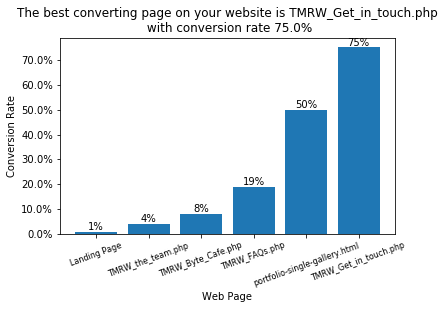

In [1]:
import json
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

# function to extract values from JSON to dictionary
def get_values_from_json(file_address):
    temp_json = json.load(open(file_address))
    temp_json = temp_json['reports'][0]['data']['rows']
    result = {}
    for row in temp_json:
        key = row['dimensions'][0]
        result[key] = int(row['metrics'][0]['values'][0])
    return result

def calculate_conversion(goal_actions, number_of_sessions):
    result = (goal_actions / number_of_sessions)
    return round(result, 2)

# function to remove values for "(entrance)"
def remove_key(dictionary, key):
    result = dict(dictionary)
    del result[key]
    return result


# function to format ga:Page parameter
def pretty_names(names):
    result = []
    for name in names:
        name = name[1:]
        if len(name) == 0:
            name = "Landing Page"
        result.append(name)
    return result

# Function Formatter
def to_percent(y, position):
    s = str(100 * y)
    return s + '%'


def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        value = height*100
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % value + "%",
                ha='center', va='bottom')



def main():
    goal = get_values_from_json("task_data/Goal1CompletionLocation_Goal1Completions.json")
    goal = remove_key(goal, "(entrance)")
    session = get_values_from_json("task_data/Sessions_Page.json")

    goal_location_keys = goal.keys()
    session_keys = session.keys()
    # Count total number of session (left an ability to handle more interesting cases, like "Begin with")
    total_sessions = {}
    for key in goal_location_keys:
        total_sessions[key] = 0
        for sub_key in session_keys:
            if sub_key == key:
                total_sessions[key] = total_sessions[key] + int(session[sub_key])

    conversion_rates = {}
    for key in goal_location_keys:
        if total_sessions[key] != 0:
            conversion_rates[key] = calculate_conversion(int(goal[key]), total_sessions[key])

    pprint(conversion_rates)

    #building a bar chart
    x = np.arange(len(conversion_rates))
    y = sorted(conversion_rates.values())
    labels = pretty_names(sorted(conversion_rates, key=conversion_rates.get))

    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)

    formatter = FuncFormatter(to_percent)
    ax.yaxis.set_major_formatter(formatter)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(8)
        tick.label.set_rotation(20)

    best_conversion_key = max(conversion_rates, key=conversion_rates.get)
    best_conversion = conversion_rates[best_conversion_key]

    plt.title("The best converting page on your website is " + best_conversion_key[1:] +
              "\n with conversion rate " + str(round(best_conversion*100,2)) + "%" )
    plt.xlabel("Web Page")
    plt.ylabel("Conversion Rate")
    plt.xticks(x, labels)

    series_1 = plt.bar(x,y)
    autolabel(series_1, ax)

    plt.show()

if __name__ == "__main__":
    main()
